### Generate: Acoustic impedance, normalized elastic impedance, lambda-mu-rho, AVO and angle gathers 

Dataset: well #5 from Avseth et al. (2010)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import impedance as ip
import avo_func as avo
import las

%matplotlib inline

Import well 5

In [2]:
well_5 = las.LASReader('well_5.las', null_subs=np.nan)
w5z=well_5.data['DEPT']
w5vp=well_5.data['Vp']/100
w5vs=well_5.data['Vs']/100
w5vpvs=well_5.data['Vp']/well_5.data['Vs']
w5rho=well_5.data['RHOB']
w5gr=well_5.data['GR']

In [3]:
rho_mineral = 2.65
rho_fluid = 1.05
w5phi = (rho_mineral-w5rho)/(rho_mineral-rho_fluid)

Plot the logs

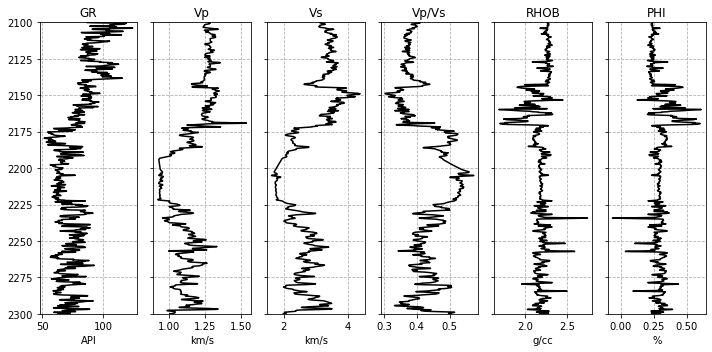

In [11]:
log = ['GR', 'Vp', 'Vs','Vp/Vs','RHOB','PHI']
unit = ['API', 'km/s','km/s',' ','g/cc','%']

f, ax = plt.subplots(nrows=1,ncols=6,figsize=(10,5))
for i in range(len(log)):
    if i == 5:
        ax[i].plot(w5phi,well_5.data['DEPT'],'-k')
    elif i == 3:
        ax[i].plot(well_5.data['Vp']/well_5.data['Vs'],well_5.data['DEPT'],'-k')
    elif i == 1 or i == 2: 
        ax[i].plot(well_5.data[log[i]]/100,well_5.data['DEPT'],'-k')
    else:
        ax[i].plot(well_5.data[log[i]],well_5.data['DEPT'],'-k')
    ax[i].set_title(log[i])
    ax[i].set_xlabel(unit[i])
    ax[i].set_ylim(2300,2100)
    ax[i].grid(linestyle='--')
    if i != 0:
        ax[i].set_yticklabels([])
        
plt.tight_layout()

Computations - AI, NEI, LRM

In [8]:
angle = 30

#poisson ratio
pr=0.5*((w5vpvs**2-2)/(w5vpvs**2-1))

ai=ip.ai(w5vp,w5rho) # acoustic impedance
#ei=ip.ei(w5vp,w5vs,w5rho,angle) # elastic impedance
lambda_rho,mu_rho=ip.lrm(w5vp,w5vs,w5rho) # lambda rho and mu rho

#get the closest location of the top on the depth array as reference to NEI
index = (np.abs(w5z - 2170)).argmin()
#w5z[index]
nei=ip.nei(w5vp,w5vs,w5rho,w5vp[index],w5vs[index],w5rho[index],angle) # normalized elastic impedance

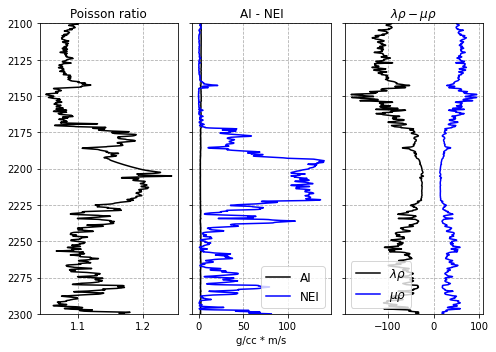

In [10]:
log = [pr, ai, nei, lambda_rho, mu_rho]
unit = ['', 'g/cc * m/s', '']
title = ['Poisson ratio', 'AI - NEI', r'$\lambda\rho - \mu\rho$']

f, ax = plt.subplots(nrows=1,ncols=3,figsize=(7,5))
for i in range(3):
    ax[i].grid(linestyle='--')
    ax[i].set_ylim(2300,2100)
    if i == 0:
        ax[i].plot(log[i],w5z,'-k')  
        ax[i].set_xlabel(unit[i]) 
        ax[i].set_title(title[i])
    elif i == 1:
        ax[i].plot(log[1],w5z,'-k',label='AI')
        ax[i].plot(log[2],w5z,'-b',label='NEI')
        ax[i].legend(loc='lower right',fontsize='large')  
        ax[i].set_yticklabels([])
        ax[i].set_xlabel(unit[i])
        ax[i].set_title(title[i])
    else:
        ax[i].plot(log[3],w5z,'-k',label=r'$\lambda\rho$')
        ax[i].plot(log[4],w5z,'-b',label=r'$\mu\rho$')
        ax[i].legend(loc='lower left',fontsize='large')  
        ax[i].set_yticklabels([])
        ax[i].set_xlabel(unit[i])
        ax[i].set_title(title[i])
plt.tight_layout()

Crossplot

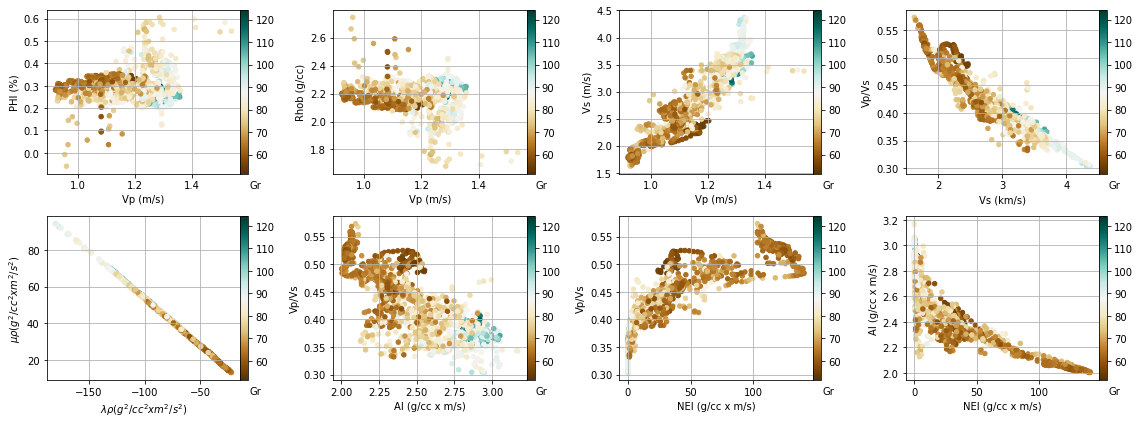

In [14]:
fig=plt.figure(figsize=(16,6))

ax=plt.subplot(2,4,1)
plt.scatter(w5vp,w5phi,20,c=w5gr,cmap='BrBG')
ax.set_xlabel('Vp (m/s)')
ax.set_ylabel('PHI (%)')
plt.grid()
cbar=plt.colorbar(pad=0)
cbar.set_label('Gr',labelpad=-19,y=-0.04, rotation=0)

ax=plt.subplot(2,4,2)
plt.scatter(w5vp,w5rho,20,c=w5gr,cmap='BrBG')
ax.set_xlabel('Vp (m/s)')
ax.set_ylabel('Rhob (g/cc)')
plt.grid()
cbar=plt.colorbar(pad=0)
cbar.set_label('Gr',labelpad=-19,y=-0.04, rotation=0)

ax=plt.subplot(2,4,3)
plt.scatter(w5vp,w5vs,20,c=w5gr,cmap='BrBG')
ax.set_xlabel('Vp (m/s)')
ax.set_ylabel('Vs (m/s)')
plt.grid()
cbar=plt.colorbar(pad=0)
cbar.set_label('Gr',labelpad=-19,y=-0.04, rotation=0)

ax=plt.subplot(2,4,4)
plt.scatter(w5vs,w5vpvs,20,c=w5gr,cmap='BrBG')
ax.set_xlabel('Vs (km/s)')
ax.set_ylabel('Vp/Vs')
plt.grid()
cbar=plt.colorbar(pad=0)
cbar.set_label('Gr',labelpad=-19,y=-0.04, rotation=0)

ax=plt.subplot(2,4,5)
plt.scatter(lambda_rho,mu_rho,20,c=w5gr,cmap='BrBG')
ax.set_xlabel(r'$\lambda\rho (g^2/cc^2 x m^2/s^2)$')
ax.set_ylabel(r'$\mu\rho (g^2/cc^2 x m^2/s^2)$')
plt.grid()
cbar=plt.colorbar(pad=0)
cbar.set_label('Gr',labelpad=-19,y=-0.04, rotation=0)

ax=plt.subplot(2,4,6)
plt.scatter(ai,w5vpvs,20,c=w5gr,cmap='BrBG')
ax.set_xlabel('AI (g/cc x m/s)')
ax.set_ylabel('Vp/Vs')
plt.grid()
cbar=plt.colorbar(pad=0)
cbar.set_label('Gr',labelpad=-19,y=-0.04, rotation=0)

ax=plt.subplot(2,4,7)
plt.scatter(nei,w5vpvs,20,c=w5gr,cmap='BrBG')
ax.set_xlabel('NEI (g/cc x m/s)')
ax.set_ylabel('Vp/Vs')
plt.grid()
cbar=plt.colorbar(pad=0)
cbar.set_label('Gr',labelpad=-19,y=-0.04, rotation=0)

ax=plt.subplot(2,4,8)
plt.scatter(nei,ai,20,c=w5gr,cmap='BrBG')
ax.set_xlabel('NEI (g/cc x m/s)')
ax.set_ylabel('AI (g/cc x m/s)')
plt.grid()
cbar=plt.colorbar(pad=0)
cbar.set_label('Gr',labelpad=-19,y=-0.04, rotation=0)

plt.tight_layout()

AVO

In [7]:
theta = np.arange(0,angle+1,1)
I,G,shuey,_ = avo.shuey(w5vp[index],w5vs[index],w5rho[index],w5vp[index+1],w5vs[index+1],w5rho[index+1],theta)

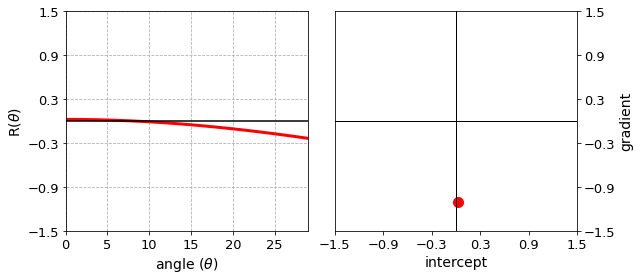

In [17]:
mxplot=1.5

f, ax = plt.subplots(nrows=1,ncols=2,figsize=(9,4))

ax[0].plot(theta,shuey,'-',color='red',linewidth=3)
ax[0].axhline(0, color='k')
ax[0].set_xlabel('angle ($\\theta$)', fontsize=14)
ax[0].set_ylabel('R($\\theta$)', fontsize=14)
yt=np.linspace(-mxplot,mxplot,6)
ax[0].set_yticks(yt)
ax[0].set_xlim(0.,np.max(angle-1))
ax[0].set_ylim(-mxplot,mxplot)
ax[0].tick_params(labelsize=13)
ax[0].grid(linestyle='--')

ax[1].plot(I,G,'o',color='red',markersize=10)
ax[1].axhline(0, color='k', lw=1)
ax[1].axvline(0, color='k', lw=1)
ax[1].set_xlabel('intercept', fontsize=14)
ax[1].set_ylabel('gradient', fontsize=14)
ax[1].set_xlim(-mxplot,mxplot)
ax[1].set_ylim(-mxplot,mxplot)
yt=np.linspace(-mxplot,mxplot,6)
xt=np.linspace(-mxplot,mxplot,6)
ax[1].set_yticks(yt)
ax[1].set_xticks(xt)
ax[1].xaxis.set_label_position('bottom')
ax[1].xaxis.tick_bottom()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].tick_params(labelsize=13)

plt.tight_layout()

Generate the angle gather

In [9]:
theta = np.arange(0,angle+1,1)
anglegather=np.zeros((len(w5vp),len(theta)))
NI=np.zeros((len(w5vp)))

In [10]:
theta = np.arange(0,angle+1,1)

anglegather=np.zeros((len(w5vp),len(theta)))
NI=np.zeros((len(w5vp)))
                     
rc=avo.reflect_coef(np.nan_to_num(ai)+1e-17) #reflection coefficient - normal incidence
#define the ricker wavelet
freq=25
length = 0.150
dt = 0.001
time,wavelet=avo.rickerwave(freq, length, dt)
#normal incidence offset gather
NI=np.convolve(wavelet,rc,mode='same')
#reflectivity on a interface
reflect,r0,g=avo.shueyrc(w5vp,w5vs,w5rho,theta)
#generate the angle gather
gather=[]
for j in range(len(theta)):
    gather.append(np.convolve(wavelet,reflect[:,j],mode='same'))
anglegather=np.asarray(gather).T

Plot the angle gather

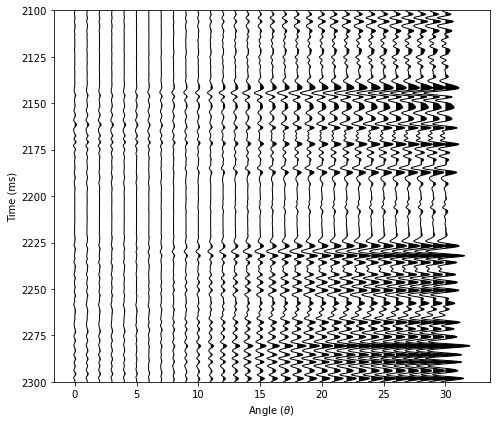

In [11]:
scale_factor=1. #this is scalable according to the plot
anglegatherplt=anglegather*scale_factor #just for the plot
f, ax = plt.subplots(nrows=1,ncols=1,figsize=(7,6))
for i in range(len(theta)):
    ax.plot(i+anglegatherplt[:,i],w5z,'k',linewidth=1)
    np.warnings.filterwarnings('ignore')
    ax.fill_betweenx(w5z,anglegatherplt[:,i]+i,i,
                        where=anglegatherplt[:,i]+i>i,facecolor='black')
ax.set_ylim(2300,2100)
ax.set_xlabel('Angle ($\\theta$)')
ax.set_ylabel('Time (ms)')
plt.tight_layout()

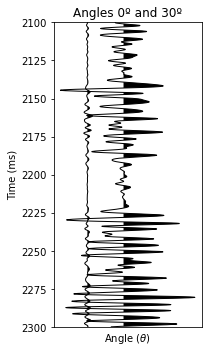

In [12]:
scale_factor=1. #this is scalable according to the plot
anglegatherplt=anglegather*scale_factor #just for the plot
f, ax = plt.subplots(nrows=1,ncols=1,figsize=(3,5))
i=0
ax.plot(anglegatherplt[:,i],w5z,'k',linewidth=1)
np.warnings.filterwarnings('ignore')
ax.fill_betweenx(w5z,anglegatherplt[:,i]+i,i,
                    where=anglegatherplt[:,i]+i>i,facecolor='black')
i=30
ax.plot(1+anglegatherplt[:,i],w5z,'k',linewidth=1)
np.warnings.filterwarnings('ignore')
ax.fill_betweenx(w5z,anglegatherplt[:,i]+1,1,
                    where=anglegatherplt[:,i]+i>i,facecolor='black')


ax.set_ylim(2300,2100)
ax.set_xlabel('Angle ($\\theta$)')
ax.set_ylabel('Time (ms)')
ax.tick_params(axis='x',bottom=False,labelbottom=False)
plt.title('Angles 0º and 30º')
plt.tight_layout()

## References

Avseth, P., Mukerji, T., & Mavko, G., 2010. Quantitative seismic interpretation: Applying rock physics tools to reduce interpretation risk. Cambridge university press.

Shuey,R.T., 1985, A simplification of Zoeppritz equations: Geophysics, 50, 609–614.

The dataset: https://srb.stanford.edu/quantitative-seismic-interpretation